In [1]:
import networkx as nx
import json
import pandas as pd
import matplotlib.pyplot as plt
import math
from sympy import binomial
import numpy as np
import time
from matplotlib.animation import FuncAnimation
import powerlaw
from networkx.algorithms.community import greedy_modularity_communities
from networkx import fruchterman_reingold_layout
import random

In [2]:
df = pd.read_csv("musae_git_edges.csv")
df

,id_1,id_2
0,0,23977
1,1,34526
2,1,2370
3,1,14683
4,1,29982
...,...,...
288998,37527,37596
288999,37529,37601
289000,37644,2347
289001,25879,2347


In [3]:
G = nx.from_edgelist(df.to_numpy().tolist())

In [4]:
# nx.draw(G)
print("Size:")
print(f"{len(G.nodes())}")
print(G)

Size:
37700
Graph with 37700 nodes and 289003 edges


# Wybrane parametry sieci

link do datasetu
https://snap.stanford.edu/data/github-social.html

# Wygląd
![Siec](./screenshot_114137.png)

In [5]:
print(len(G.nodes()))

37700


In [6]:
deg_sum = sum(G.degree(node) for node in G.nodes())
avg_deg = deg_sum / G.number_of_nodes()
print(f"Średni stopień wierzchołka: {avg_deg}")

Średni stopień wierzchołka: 15.331724137931035


In [7]:
N = G.number_of_nodes()
E = G.number_of_edges()
print('Sieć jest rzadka\n' if avg_deg < 0.1 * N else 'Sieć nie jest rzadka\n')

Sieć jest rzadka


In [8]:
avg_cluster = nx.average_clustering(G)
print('Zgronowanie: ', avg_cluster)
temp = E / binomial(N, 2)
print('Sieć jest silnie zgronowana\n' if temp < 0.1 * avg_cluster else 'Sieć nie jest silnie zgronowana\n')

Zgronowanie:  0.16753704480107323
Sieć jest silnie zgronowana


In [9]:
# small_world_coef = nx.omega(G)
# print(small_world_coef)
# match small_world_coef:
#     case num if -0.4 <= num <= 0.4:
#         print("Siec małych światów")
#     case num if num < -0.4:
#         print("Lattice (nie wiem jak to przetłumaczyć) graf")
#     case num if num > 0.4:
#         print("Graf losowy")

In [10]:
pagerank_values = nx.pagerank(G)
srednia_pagerank = sum(pagerank_values.values()) / len(pagerank_values)
print(f"\nśrednia wartość PageRank: {srednia_pagerank}")

najwieksza_pagerank = max(pagerank_values, key=pagerank_values.get)
print(f"największa wartość PageRank: {pagerank_values[najwieksza_pagerank]} (Wierzchołek: {najwieksza_pagerank})")

najmniejsza_pagerank = min(pagerank_values, key=pagerank_values.get)
print(f"najmniejsza wartość PageRank: {pagerank_values[najmniejsza_pagerank]} (Wierzchołek: {najmniejsza_pagerank})\n")


średnia wartość PageRank: 2.652519893899232e-05
największa wartość PageRank: 0.016513889880936803 (Wierzchołek: 31890)
najmniejsza wartość PageRank: 4.9761689418796604e-06 (Wierzchołek: 31560)


In [11]:


deg = [stopien for wierzcholek, stopien in G.degree()]
model = powerlaw.Fit(deg)
wspolczynnik = model.power_law.alpha

# Jeśli współczynnik jest bliski -2, to graf może być bezskalowy
bezskalowy = abs(wspolczynnik + 2) < 0.1
print(f"Skalowość wartość: {bezskalowy}")

Calculating best minimal value for power law fit
Skalowość wartość: False


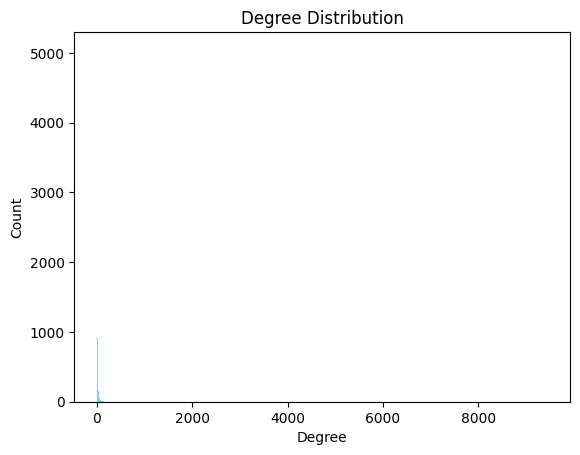

In [12]:
degree_distribution = nx.degree_histogram(G)
plt.bar(range(len(degree_distribution)), degree_distribution, width=0.8, color='skyblue')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.show()

![Local Image](./degree.png)

In [13]:
clustering_coefficient = nx.average_clustering(G)

# Wyświetlenie wyniku
print("Średni współczynnik klastrowania:", clustering_coefficient)

Średni współczynnik klastrowania: 0.16753704480107323


In [14]:
degree_centrality = nx.degree_centrality(G)
print("Stopnie centralności:", degree_centrality)

Stopnie centralności: {0: 2.6525902543834053e-05, 23977: 0.0008488288814026897, 1: 0.00021220722035067242, 34526: 5.3051805087668106e-05, 2370: 0.001061036101753362, 14683: 0.0028117456696464095, 29982: 0.012971166343934852, 21142: 0.01827634685270166, 20363: 0.010742990530252792, 23830: 0.0009018806864903578, 34035: 5.3051805087668106e-05, 6067: 5.3051805087668106e-05, 19720: 0.001034510199209528, 20183: 7.957770763150216e-05, 3: 0.00013262951271917026, 4950: 2.6525902543834053e-05, 18029: 0.0007692511737711875, 3358: 0.000530518050876681, 34935: 0.0007692511737711875, 5916: 0.000503992148332847, 4: 5.3051805087668106e-05, 2865: 7.957770763150216e-05, 9342: 0.00018568131780683837, 5: 2.6525902543834053e-05, 27803: 0.18793601952306427, 6: 0.0001591554152630043, 18612: 0.000503992148332847, 18876: 0.008010822568237885, 31890: 0.25088198625958247, 17647: 0.001485450542454707, 18562: 0.00928406589034192, 7: 0.00021220722035067242, 37493: 0.0027852197671025757, 33643: 0.014164831958407384,

In [15]:
# closeness_centrality = nx.closeness_centrality(G)
# betweenness_centrality = nx.betweenness_centrality(G)

In [16]:
def check_connected_component(graph):
    is_connected = nx.is_connected(graph)

    print(f"czy graf ma składową spójną? {is_connected}")
    return is_connected


def percolate(graph, probability):
    for edge in graph.edges():
        if random.random() > probability:
            graph.remove_edge(*edge)
    print(f'czy graf jest spójny po perkolacji, dla współczynnika {probability}: ', check_connected_component(G))



percolation_probability = 0.2
percolate(G.copy(), percolation_probability)

czy graf ma składową spójną? True
czy graf jest spójny po perkolacji, dla współczynnika 0.2:  True


In [ ]:
avg_path = nx.average_shortest_path_length(G)

In [ ]:
n = len(G.nodes())
p = nx.density(G)

random_graph = nx.random_graphs.erdos_renyi_graph(n, p)
random_clustering_coefficient = nx.average_clustering(random_graph)
random_average_path_length = nx.average_shortest_path_length(random_graph)

print("Random Graph Clustering Coefficient:", random_clustering_coefficient)
print("Random Graph Average Path Length:", random_average_path_length)

if clustering_coefficient > random_clustering_coefficient and avg_path < random_average_path_length:
    print("The graph exhibits small-world properties.")
else:
    print("The graph does not exhibit small-world properties.")


In [ ]:
# val = nx.sigma(G)
# # technicznie lepszy jest parametr nx.omega(G) ale mój komputer nie jest w stanie policzyć tego w rozsądnym czasie
# print(val)